# SI 330: Homework 6: Investigating Sports Teams Drafts Using Pandas


## Due: Friday, February 23, 2018,  11:59:00pm

### Submission instructions</font>
After completing this homework, you will turn in two files via Canvas ->  Assignments -> HW 5:
Your Notebook, named si330-hw5-YOUR_UNIQUE_NAME.ipynb and
the HTML file, named si330-hw5-YOUR_UNIQUE_NAME.html.

### Name:  YOUR NAME GOES HERE
### Uniqname: YOUR UNIQNAME GOES HERE
### People you worked with: [if you didn't work with anyone else write "I worked by myself" here].


## Learning Objectives
After completing this Homework, you should know how to:

* To gain experience scraping data from web pages
* To practice loading CSV files via pandas
* To learn how to combine datasets
* To create a simple visualization using a scatterplot matrix
 

## Goals
To use data from two sources (Wikipedia and basketball-reference.com) to answer a series of questions and investigate the data.

## Background

In a draft, National Basketball Association (NBA) teams took turns selecting amateur U.S. college basketball players and other eligible players, including international players. (https://en.wikipedia.org/wiki/2011_NBA_draft) 

A draft is a process used in some countries and sports to allocate certain players to teams. In a draft, teams take turns selecting from a pool of eligible players. When a team selects a player, the team receives exclusive rights to sign that player to a contract, and no other team in the league may sign the player.
The best-known type of draft is the entry draft, which is used to allocate players who have recently become eligible to play in a league. Depending on the sport, the players may come from college, high school or junior teams or teams in other countries.
An entry draft is intended to prevent expensive bidding wars for young talent and to ensure that no one team can sign contracts with all of the best young players and make the league uncompetitive. To encourage parity, teams that do poorly in the previous season usually get to choose first in the postseason draft, sometimes with a "lottery" factor to discourage teams from deliberately losing.
(https://en.wikipedia.org/wiki/Draft_(sports))

## Data Sources 

We will be using two sources of data for this assignment:  Basketball Reference (www.basketball-reference.com) and Wikipedia.  We have provided data from Basketball Reference in the form of CSV files.  You will need to scrape data from Wikipedia.  For this assignment you will need to use 10 years of data (from 2008 to 2017).  That means you will need to use the 10 CSV files we give you as well as scraping from Wikipedia:

1. https://en.wikipedia.org/wiki/2008_NBA_draft
1. https://en.wikipedia.org/wiki/2009_NBA_draft
1. https://en.wikipedia.org/wiki/2010_NBA_draft
1. https://en.wikipedia.org/wiki/2011_NBA_draft
1. https://en.wikipedia.org/wiki/2012_NBA_draft
1. https://en.wikipedia.org/wiki/2013_NBA_draft
1. https://en.wikipedia.org/wiki/2014_NBA_draft
1. https://en.wikipedia.org/wiki/2015_NBA_draft
1. https://en.wikipedia.org/wiki/2016_NBA_draft
1. https://en.wikipedia.org/wiki/2017_NBA_draft

You will need to use data from the two sources to answer the following questions.  In some cases you will need to join the data from the two sources; in other cases you will be able to answer the questions by using the data from only one source.

First, let's load the libraries that we'll need:

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re

## Step 1: Read the data

You'll need to load the data from both Wikipedia and from the CSV files that we provided from basketball-reference.com.  Let's start with the CSV files.




### Step 1a: Read the CSV files
Each of the CSV files has the same format.  There are two header lines and 60 data lines.  The first 30 data lines 
represent players from the first round of drafts and the last 30 data lines represent players from the 
second round of drafts.

Note that you will need to clean up the Player column (keeping only the actual name).

#### <font color="magenta">Read the data from each file, adding two columns: </font> 
1. one for the year and (HINT: it's in the filename)
1. one for the draft round (1 or 2). (HINT: np.where() might help)

Your resulting DataFrame should look like:


![](bbref.png)

In [2]:
years = list(range(2008,2018))
firstYear = years.pop()
print (firstYear)
df_bbref = pd.read_csv('NBA_'+str(firstYear)+'.csv')
df_bbref['Year'] = firstYear
while years:
    year = years.pop()
    dx = pd.read_csv('NBA_' + str(year) + '.csv')
    dx['Year'] = year
    df_bbref = pd.concat([df_bbref, dx]).reset_index(drop=True)
df_bbref['Player'] = df_bbref['Player'].str.extract(r'(.+)\\',expand=False)
df_bbref['Round'] = np.where(df_bbref['Pk'] < 31, 1, 2)


2017


FileNotFoundError: [Errno 2] File b'NBA_2017.csv' does not exist: b'NBA_2017.csv'

In [7]:
firstYear = years.pop

### Step 1b: Read the Wikipedia tables
Create a dataframe that stores the data for all the years. You will need to start with each url, store the table as a dataframe and concatenate the dataframes.  We've provided most of the code for you.  
#### <font color="magenta">All you need to do is fill in the correct values for ```headerLine``` and ```tableNumber```, which are used in the read_html line below.</font>

In [4]:
headerLine = 0 # Replace -9 with the correct value
tableNumber = 3 # Replace -9 with the correct value

In [8]:
df_wiki = pd.DataFrame()
urls = ['https://en.wikipedia.org/wiki/2017_NBA_draft',
        'https://en.wikipedia.org/wiki/2016_NBA_draft', 
        'https://en.wikipedia.org/wiki/2015_NBA_draft', 
        'https://en.wikipedia.org/wiki/2014_NBA_draft', 
        'https://en.wikipedia.org/wiki/2013_NBA_draft', 
        'https://en.wikipedia.org/wiki/2012_NBA_draft', 
        'https://en.wikipedia.org/wiki/2011_NBA_draft', 
        'https://en.wikipedia.org/wiki/2010_NBA_draft', 
        'https://en.wikipedia.org/wiki/2009_NBA_draft', 
        'https://en.wikipedia.org/wiki/2008_NBA_draft']

for url in urls:
    dx = pd.read_html(url, header=headerLine)[tableNumber]
    df_wiki = pd.concat([df_wiki, dx]).reset_index(drop=True)
    
dx

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  from ipykernel import kernelapp as app


,Round,Pick,Player,Position,Nationality[n 1],Team,School/club team
0,1,1,Derrick Rose*~,PG,United States,Chicago Bulls,Memphis (Fr.)
1,1,2,Michael Beasley,PF,United States,Miami Heat,Kansas State (Fr.)
2,1,3,O. J. Mayo,SG,United States,Minnesota Timberwolves (traded to Memphis)[a],USC (Fr.)
3,1,4,Russell Westbrook*,PG,United States,Seattle SuperSonicsa[›],UCLA (So.)
4,1,5,Kevin Love*,PF,United States,Memphis Grizzlies (traded to Minnesota)[a],UCLA (Fr.)
5,1,6,Danilo Gallinari,SF,Italy,New York Knicks,Olimpia Milano (Italy)
6,1,7,Eric Gordon,SG,United States,Los Angeles Clippers,Indiana (Fr.)
7,1,8,Joe Alexander,SF,United States,Milwaukee Bucks,West Virginia (Jr.)
8,1,9,D. J. Augustin,PG,United States,Charlotte Bobcats,Texas (So.)
9,1,10,Brook Lopez+,C,United States,New Jersey Nets,Stanford (So.)


### 1.1 Cleaning the Wikipedia data

You will see that some of the columns are repeated with minor modifications (e.g. "School / club team" and "School/club team" -- notice the different spacing) and there are values in only one or the other column. That is because the wikipedia column headers are not consistent.

#### <font color="magenta">Combine all the columns that have different names but contain the same variables.  Drop the extra columns when you're done combining them.</font>

In [6]:
df_wiki['Position'] = df_wiki['Pos.'][pd.notna(df_wiki['Pos.'])].append(df_wiki['Position'][pd.notna(df_wiki['Position'])])

df_wiki['Round'] = df_wiki['Rnd.'][pd.notna(df_wiki['Rnd.'])].append(df_wiki['Round'][pd.notna(df_wiki['Round'])])
df_wiki['Round'] = pd.to_numeric(df_wiki['Round'], downcast='integer')

df_wiki['School/club team'] = df_wiki['School / club team'][pd.notna(df_wiki['School / club team'])].append(df_wiki['School/club team'][pd.notna(df_wiki['School/club team'])])


In [7]:
df_wiki = df_wiki.drop(columns = ['Pos.', 'Rnd.', 'School / club team'])

#### <font color="magenta">Rename the columns so that they are easier to read.</font>
Your resulting columns should be: Nationality, Pick, Player, Position, Round, From, and Team.  The "From" column is the "School/club team" columns in the original dataset; the other column names should be self-explanatory.

In [52]:
df_wiki.columns = ['Nationality', 'Pick', 'Player', 'Position', 'Round', 'School/club team', 'Team']

You'll notice that the player names look weird (they're doubled).  
#### <font color="magenta">Fix that.

In [53]:
df_wiki.head()

,Nationality,Pick,Player,Position,Round,School/club team,Team
0,United States,1,"Fultz, MarkelleMarkelle Fultz",PG/SG,1,Washington (Fr.),Philadelphia 76ers (from Brooklyn via Boston)[...
1,United States,2,"Ball, LonzoLonzo Ball",PG,1,UCLA (Fr.),Los Angeles Lakers
2,United States,3,"Tatum, JaysonJayson Tatum",SF,1,Duke (Fr.),Boston Celtics (from Sacramento via Philadelph...
3,United States,4,"Jackson, JoshJosh Jackson",SF,1,Kansas (Fr.),Phoenix Suns
4,United States,5,"Fox, De'AaronDe'Aaron Fox",PG,1,Kentucky (Fr.),Sacramento Kings (from Philadelphia)[C]


In [ ]:
df_wiki['Player']

In [56]:
# Clean the entries first
df_wiki['Player'] = [re.sub(r'(\[[0-9]+\])*[#*~]', '', entry) for entry in df_wiki['Player']]

In [64]:
df_wiki['Player'] = [entry[int((len(entry)+1)/2):len(entry)] for entry in df_wiki['Player']]

In [ ]:
re.strip(df_wiki['Player'])

In [65]:
df_wiki.head()

,Nationality,Pick,Player,Position,Round,School/club team,Team
0,United States,1,Markelle Fultz,PG/SG,1,Washington (Fr.),Philadelphia 76ers (from Brooklyn via Boston)[...
1,United States,2,Lonzo Ball,PG,1,UCLA (Fr.),Los Angeles Lakers
2,United States,3,Jayson Tatum,SF,1,Duke (Fr.),Boston Celtics (from Sacramento via Philadelph...
3,United States,4,Josh Jackson,SF,1,Kansas (Fr.),Phoenix Suns
4,United States,5,De'Aaron Fox,PG,1,Kentucky (Fr.),Sacramento Kings (from Philadelphia)[C]


In [66]:
df_wiki.to_csv('df_wiki.csv')

## Step 2. Players’ nationalities

Answer each of the following questions.  You will need to decide how to handle cases where players identify multiple nationalities.

* <font color="magenta">What proportion of **Round 1** draft picks identify their nationality as something other than U.S.A?
* <font color="magenta">Excluding nationalities of “U.S.A”, what are the 10 most common nationalities of **Round 1** draft picks?



In [67]:
# put your code here
pd.options.display.max_rows = 600
print(df_wiki['Nationality'])

0                                  United States
1                                  United States
2                                  United States
3                                  United States
4                                  United States
5                                  United States
6                                        Finland
7                                    France[n 2]
8                                  United States
9                                  United States
10                                 United States
11                                 United States
12                                 United States
13                                 United States
14                                 United States
15                                 United States
16                                 United States
17                   Israel  United States [n 3]
18                                 United States
19                                 United States
20                  

In [68]:
df_wiki['Nationality'] = [re.split("( \xa0)|\[", i)[0] for i in df_wiki['Nationality']]

In [69]:
df_wiki[['Player', 'Nationality']].to_csv("df_nationality.csv")

In [71]:
sum((df_wiki['Nationality'] != "United States") & (df_wiki["Round"] == 1))/sum(df_wiki["Round"] == 1)

0.25666666666666665

In [72]:
sum((df_wiki['Nationality'] != "United States") & (df_wiki["Round"] == 2))/sum(df_wiki["Round"] == 2)

0.34

In [73]:
df_wiki['Nationality'][(df_wiki['Nationality'] != "United States") & (df_wiki['Round'] == 1)].value_counts()[:10]

Canada       10
France       10
Spain         4
Croatia       4
DR Congo      3
Australia     3
Serbia        3
Brazil        3
Greece        3
Lithuania     3
Name: Nationality, dtype: int64

In [74]:
df_wiki['Nationality'][(df_wiki['Nationality'] != "United States") & (df_wiki['Round'] == 2)].value_counts()[:10]

Serbia       11
France       10
Turkey        6
Canada        6
Greece        5
Nigeria       5
Australia     5
Croatia       4
Spain         4
Slovenia      3
Name: Nationality, dtype: int64

## Step 3: Which schools or teams are the players from?

You can get the required data from either of the data sources. Choose the most complete source.  Answer the following question.
* <font color="magenta">What are the top 10 Schools/Clubs/Colleges that Round 1 players are picked from?  



In [75]:
df_bbref['College'][df_bbref['Pk'] <= 30].value_counts()[:10]

University of Kentucky                  23
Duke University                         15
University of North Carolina            13
University of Kansas                    12
University of California Los Angeles    11
Syracuse University                     10
University of Texas at Austin            8
University of Arizona                    8
University of Washington                 7
Indiana University                       6
Name: College, dtype: int64

In [76]:
df_bbref['College'][df_bbref['Pk'] > 30].value_counts()[:10]

University of Kentucky                  9
University of Oregon                    8
University of Kansas                    8
University of California Los Angeles    5
University of California                5
University of Oklahoma                  5
Syracuse University                     5
University of Missouri                  4
University of Virginia                  4
Florida State University                4
Name: College, dtype: int64

## Step 4: Adding a new column

#### <font color="magenta">Create a new column called “outcome” and assign values based on information from the Wikipedia pages as follows:
* If a player was selected for (i) at least one All-Star Game, or (ii) at least one All-NBA Team, or (iii) both at least one All-Star Game and at least one All-NBA team, assign the value “high” to the “outcome” column

* If a player never played in the NBA regular season or playoffs, assign “low” to the “outcome” column

* Otherwise, assign “medium” to the “outcome” column


In [154]:
# put your code here

In [77]:
outcome = []
for url in urls:
    html = requests.get(url)
    soup = BeautifulSoup(html.content, 'html.parser')
    draft_picks = soup.select("table.wikitable.sortable")[0]
    data_rows = draft_picks.findAll('tr')[1:]
    for i in range(len(data_rows)):
        if data_rows[i].find_all('td', {"bgcolor" : re.compile(r"#CCFFCC|#FFCC00|#FBCEB1")}):
            for td in data_rows[i].find_all('td', {"bgcolor" : re.compile(r"#CCFFCC|#FFCC00|#FBCEB1")}):
                outcome.append("High")
        elif data_rows[i].find_all('td', {"bgcolor" : re.compile(r"#C0C0C0")}):
            for td in data_rows[i].find_all('td', {"bgcolor" : re.compile(r"#C0C0C0")}):
                outcome.append("Low")
        else:
            outcome.append("Medium")    

In [78]:
df_bbref['Outcome'] = outcome

## Step 5: Save and upload your data
#### <font color="magenta">Write your resulting dataframe to a **tab-separated** file
called si330w18-YOURUNIQNAME-lab6data.txt and **upload your file to the AWS S3 bucket you created** earlier in the course. Record the URL of the **tab-separated** file in the following Markdown block.

In [80]:
# Put your code here
df_bbref.to_csv('df.csv', sep='\t')

PUT THE URL TO YOUR UPLOADED DATA HERE

## Step 6: Create a visualization

Using the lab as a guide, and remembering that the iris data pairplot example (https://seaborn.pydata.org/generated/seaborn.pairplot.html) create a pairplot of 'MP/Game', 'PTS/Game', 'TRB/Game', 'AST/Game', and “VORP”   (https://www.basketball-reference.com/about/bpm.html)  setting the color (hue) according to the value in the “Outcome” column. 

**NOTE:** You will need to join your two dataframes (one from basketball-reference.com and one from Wikipedia) on the 'Player' column.  Assuming you have two dataframes called 'df_bbref' and 'df_wiki', you could use something like:

```
df_wiki.set_index('Player')
df_bbref.set_index('Player')
df_joined = df_wiki.join(df_bbref,rsuffix='_r') 
``` 

to join the two DataFrames.

In [84]:
df_wiki.set_index('Player')
df_bbref.set_index('Player')

,Rk,Pk,Tm,College,Yrs,G,MP,PTS,TRB,AST,...,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Year,Round,Outcome
Player,,,,,,,,,,,,,,,,,,,,,
Markelle Fultz,1,1,PHI,University of Washington,1.0,4.0,76.0,24.0,9.0,7.0,...,6.0,2.3,1.8,-0.1,-0.084,-9.9,-0.2,2017,1,Medium
Lonzo Ball,2,2,LAL,University of California Los Angeles,1.0,36.0,1222.0,367.0,257.0,255.0,...,10.2,7.1,7.1,1.0,0.038,0.9,0.9,2017,1,Medium
Jayson Tatum,3,3,BOS,Duke University,1.0,59.0,1828.0,797.0,302.0,83.0,...,13.5,5.1,1.4,5.4,0.142,0.9,1.3,2017,1,Medium
Josh Jackson,4,4,PHO,University of Kansas,1.0,57.0,1341.0,639.0,234.0,69.0,...,11.2,4.1,1.2,-1.0,-0.034,-5.2,-1.1,2017,1,Medium
De'Aaron Fox,5,5,SAC,University of Kentucky,1.0,50.0,1360.0,563.0,132.0,214.0,...,11.3,2.6,4.3,-0.6,-0.021,-4.7,-0.9,2017,1,Medium
Jonathan Isaac,6,6,ORL,Florida State University,1.0,15.0,285.0,79.0,56.0,11.0,...,5.3,3.7,0.7,0.1,0.019,-3.1,-0.1,2017,1,Medium
Lauri Markkanen,7,7,MIN,University of Arizona,1.0,51.0,1543.0,780.0,392.0,65.0,...,15.3,7.7,1.3,2.6,0.080,-1.5,0.2,2017,1,Medium
Frank Ntilikina,8,8,NYK,NaN,1.0,56.0,1125.0,293.0,114.0,178.0,...,5.2,2.0,3.2,-0.8,-0.035,-4.3,-0.6,2017,1,Medium
Dennis Smith,9,9,DAL,North Carolina State University,1.0,50.0,1467.0,742.0,194.0,246.0,...,14.8,3.9,4.9,-0.7,-0.022,-2.4,-0.2,2017,1,Medium


In [85]:
dfj = df_wiki.join(df_bbref,rsuffix='_r')

In [87]:
dfj.head()

,Nationality,Pick,Player,Position,Round,School/club team,Team,Rk,Pk,Tm,...,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Year,Round_r,Outcome
0,United States,1,Markelle Fultz,PG/SG,1,Washington (Fr.),Philadelphia 76ers (from Brooklyn via Boston)[...,1,1,PHI,...,6.0,2.3,1.8,-0.1,-0.084,-9.9,-0.2,2017,1,Medium
1,United States,2,Lonzo Ball,PG,1,UCLA (Fr.),Los Angeles Lakers,2,2,LAL,...,10.2,7.1,7.1,1.0,0.038,0.9,0.9,2017,1,Medium
2,United States,3,Jayson Tatum,SF,1,Duke (Fr.),Boston Celtics (from Sacramento via Philadelph...,3,3,BOS,...,13.5,5.1,1.4,5.4,0.142,0.9,1.3,2017,1,Medium
3,United States,4,Josh Jackson,SF,1,Kansas (Fr.),Phoenix Suns,4,4,PHO,...,11.2,4.1,1.2,-1.0,-0.034,-5.2,-1.1,2017,1,Medium
4,United States,5,De'Aaron Fox,PG,1,Kentucky (Fr.),Sacramento Kings (from Philadelphia)[C],5,5,SAC,...,11.3,2.6,4.3,-0.6,-0.021,-4.7,-0.9,2017,1,Medium


In [88]:
df_bbref.head()

,Rk,Pk,Tm,Player,College,Yrs,G,MP,PTS,TRB,...,PTS.1,TRB.1,AST.1,WS,WS/48,BPM,VORP,Year,Round,Outcome
0,1,1,PHI,Markelle Fultz,University of Washington,1.0,4.0,76.0,24.0,9.0,...,6.0,2.3,1.8,-0.1,-0.084,-9.9,-0.2,2017,1,Medium
1,2,2,LAL,Lonzo Ball,University of California Los Angeles,1.0,36.0,1222.0,367.0,257.0,...,10.2,7.1,7.1,1.0,0.038,0.9,0.9,2017,1,Medium
2,3,3,BOS,Jayson Tatum,Duke University,1.0,59.0,1828.0,797.0,302.0,...,13.5,5.1,1.4,5.4,0.142,0.9,1.3,2017,1,Medium
3,4,4,PHO,Josh Jackson,University of Kansas,1.0,57.0,1341.0,639.0,234.0,...,11.2,4.1,1.2,-1.0,-0.034,-5.2,-1.1,2017,1,Medium
4,5,5,SAC,De'Aaron Fox,University of Kentucky,1.0,50.0,1360.0,563.0,132.0,...,11.3,2.6,4.3,-0.6,-0.021,-4.7,-0.9,2017,1,Medium


In [89]:
dfjx = dfj[['MP.1', 'PTS.1', 'TRB.1', 'AST.1', "VORP"]]

/Users/loy/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
/Users/loy/miniconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


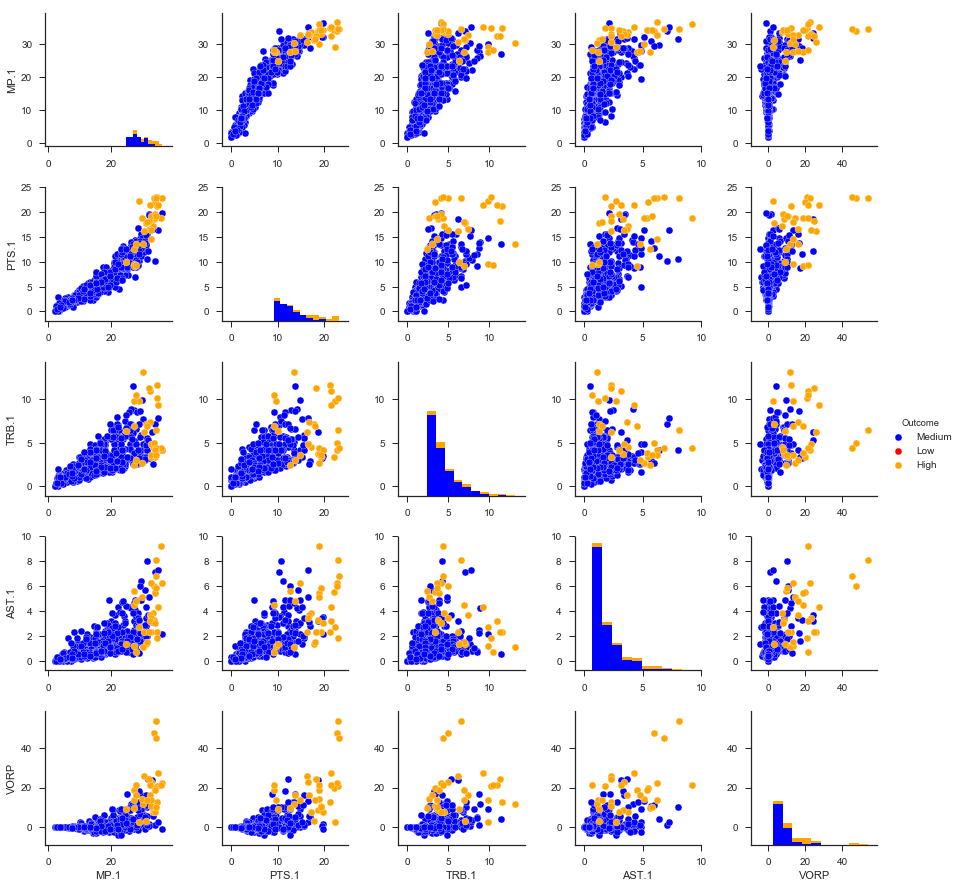

In [90]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")
dfjv = dfj[dfj['Outcome'] != np.nan]
sns.pairplot(dfjv[['MP.1', 'PTS.1', 'TRB.1', 'AST.1', "VORP","Outcome"]],hue='Outcome',palette={'Low':'red','Medium':'blue','High':'orange'},dropna=True)
#sns.pairplot(dfjx,dropna=True)

#sns.pairplot(dfj, hue='Outcome',dropna=True)

## Above and Beyond

Indicate here why you believe that your work should be considered "above and beyond".